### This notebook runs FlowSOM pixel-level clustering

In [1]:
# import required packages
from datetime import datetime as dt
import os
import subprocess

import numpy as np
import pandas as pd
import xarray as xr

from ark.phenotyping import som_utils
from ark.utils import io_utils, load_utils

### Set file paths and parameters

In [2]:
# assign data file paths
base_dir = "../data/granulomaCohort_allData"
tiff_dir = os.path.join(base_dir, "TIFs")
segmentation_dir = base_dir

# create a som datadirectory
som_dir = os.path.join(base_dir, 'run_%s' % (dt.now().strftime('%Y-%m-%dT%H:%M:%S')))
os.mkdir(som_dir)

# define the som write paths
preprocessed_dir = os.path.join(som_dir, 'pixel_mat_preprocessed')
subsetted_dir = os.path.join(som_dir, 'pixel_mat_subsetted')
som_clustered_dir = os.path.join(som_dir, 'pixel_mat_clustered')
consensus_clustered_dir = os.path.join(som_dir, 'pixel_mat_consensus')

In [ ]:
# set a random seed if desired
seed = None

In [3]:
# set mibitiff parameters
MIBItiff = False
mibitiff_suffix = '-MassCorrected-Filtered.tiff'

In [4]:
# either get all fovs in the folder...
if MIBItiff:
    fovs = io_utils.list_files(tiff_dir, substrs=MIBItiff_suffix)
else:
    fovs = io_utils.list_folders(tiff_dir)

# ... or optionally, select a specific set of fovs manually
# fovs = ["Point14"]

### Preprocess

In [6]:
# run FlowSOM preprocessing
som_utils.create_pixel_matrix(
    fovs, base_dir, tiff_dir, segmentation_dir, pre_dir=preprocessed_dir, sub_dir=subsetted_dir, seed=seed
)

### Train SOM

In [5]:
# set the channels to subset over
channels = ["CD45", "SMA", "Vimentin", "CD31", "Keratin-pan", "E-cadherin", "MastChyTry",
            "MPO", "CD20", "CD3", "CD14", "HLA-DR-DQ-DP", "Foxp3", "CD16", "CD11c", "CD206",
            "CD11b", "CD68", "CD163", "CD209"]

In [ ]:
# run the SOM clustering
som_utils.train_som(fovs, channels, base_dir, sub_dir=subsetted_dir, seed=seed)

### Assign SOM clusters

In [ ]:
# use SOM to assign clusters
som_utils.cluster_pixels(fovs, base_dir, pre_dir=preprocessed_dir, cluster_dir=som_clustered_dir)

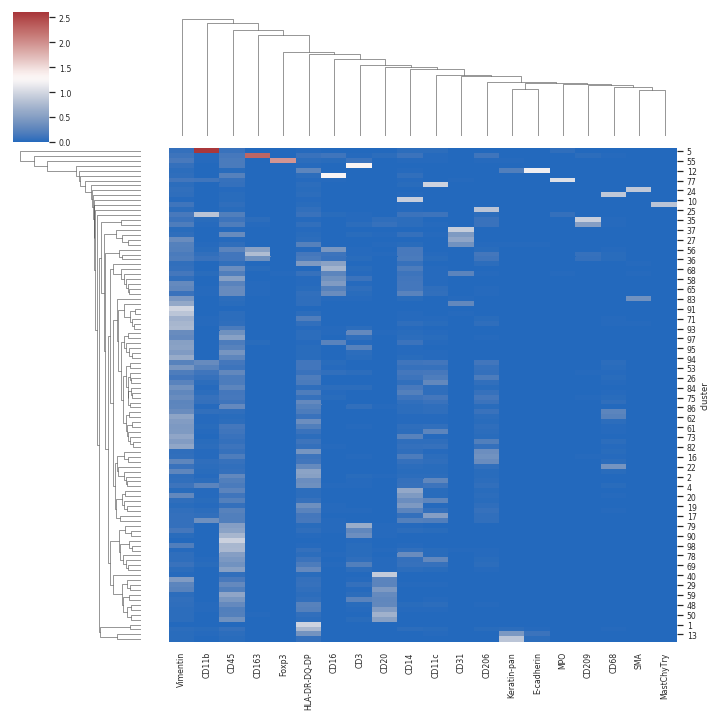

In [9]:
# visualize the pixel cluster average heatmap
som_utils.visualize_cluster_data(
    fovs, channels, base_dir, cluster_dir=som_clustered_dir, cluster_col='cluster'
)

### Run consensus clustering

In [ ]:
# run hierarchical clustering based on SOM cluster assignments
som_utils.consensus_cluster(
    fovs, channels, base_dir, cluster_dir=som_clustered_dir, consensus_dir=consensus_clustered_dir, seed=seed
)

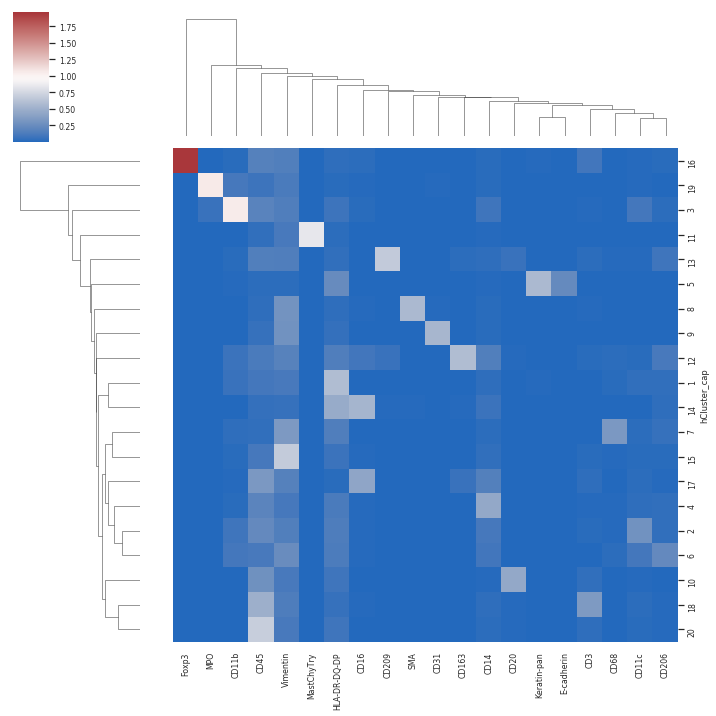

In [11]:
# visualize the pixel hierarchical cluster average heatmap
som_utils.visualize_cluster_data(
    fovs, channels, base_dir, cluster_dir=consensus_clustered_dir, cluster_col='hCluster_cap'
)

TODO: add post-processing pixel clustering steps